### 1. Re-code the house price machine learning
#### 1. Random Choose Method to get optimal k and b

In [25]:
from sklearn.datasets import load_boston
data = load_boston()
x,y = data['data'], data['target']


21.33678691699604


In [3]:
def price(rm, k, b):
    '''f(x) = k*x + b'''
    return k*rm +b

def loss(y, y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [4]:
import random
trying_times = 5000
x_rm = x[:,5]

min_loss = float('inf')
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r,k,b) for r in x_rm] 
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('tims:{}, min_loss:{}, best_k:{},\
        best_b:{}'.format(i, min_loss, best_k, best_b))

tims:0, min_loss:2139.6130975558435, best_k:3.2262303836549506,        best_b:-43.338944019706574
tims:14, min_loss:1812.4831937629442, best_k:8.053134972827962,        best_b:-70.12984360165859
tims:18, min_loss:1285.553774742044, best_k:10.154227214881288,        best_b:-6.049181274739652
tims:58, min_loss:85.07018501230887, best_k:16.058640221927263,        best_b:-82.58826551310261
tims:245, min_loss:71.988690982949, best_k:16.25910870724387,        best_b:-77.87464538948925
tims:345, min_loss:54.04654759410431, best_k:4.5055257747321065,        best_b:-5.972636172482197
tims:1730, min_loss:47.44425468380507, best_k:9.564391757098292,        best_b:-35.642401837872484


#### 2.Supervised Direction to get optimal k and b

In [21]:
trying_times = 2000
x_rm = x[:,5]

min_loss = float('inf')
best_k = random.random() * 100 - 50
best_b = random.random() * 100 - 50

direction = [
    (+1, -1), #fisrt element k's changing direction second element b's changing direction
    (+1, +1),
    (-1, +1),
    (-1, -1)
]

next_direction = random.choice(direction)
scalar = 0.1 #改成变化的尺度
for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r,current_k,current_b) for r in x_rm] 
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: #perform better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('tims:{}, min_loss:{}, best_k:{}, best_b:{}'.format(i, min_loss, best_k, best_b))
    else:
        #next_direction = random.choice(list(set(direction)-{next_direction}))
        next_direction = random.choice(direction)
print('best loss : {}, best k: {}, best b: {}'.format(min_loss, best_k, best_b))

tims:0, min_loss:71083.43316459851, best_k:-35.92904173541426, best_b:-16.318419455730407
tims:2, min_loss:70799.56210303972, best_k:-35.82904173541426, best_b:-16.418419455730408
tims:3, min_loss:70516.25944259734, best_k:-35.729041735414256, best_b:-16.51841945573041
tims:4, min_loss:70233.52518327137, best_k:-35.629041735414255, best_b:-16.61841945573041
tims:5, min_loss:69951.35932506205, best_k:-35.52904173541425, best_b:-16.718419455730412
tims:6, min_loss:69669.76186796902, best_k:-35.42904173541425, best_b:-16.818419455730414
tims:7, min_loss:69388.73281199267, best_k:-35.32904173541425, best_b:-16.918419455730415
tims:8, min_loss:69108.27215713261, best_k:-35.22904173541425, best_b:-17.018419455730417
tims:9, min_loss:68828.3799033892, best_k:-35.12904173541425, best_b:-17.118419455730418
tims:10, min_loss:68549.05605076216, best_k:-35.029041735414246, best_b:-17.21841945573042
tims:11, min_loss:68270.30059925161, best_k:-34.929041735414245, best_b:-17.31841945573042
tims:12, 

tims:315, min_loss:9879.719100170436, best_k:-4.529041735414017, best_b:-47.71841945573085
tims:316, min_loss:9774.325989186986, best_k:-4.4290417354140175, best_b:-47.818419455730854
tims:317, min_loss:9669.501279320044, best_k:-4.329041735414018, best_b:-47.918419455730856
tims:318, min_loss:9565.244970569554, best_k:-4.229041735414018, best_b:-48.01841945573086
tims:319, min_loss:9461.557062935577, best_k:-4.1290417354140185, best_b:-48.11841945573086
tims:320, min_loss:9358.437556418072, best_k:-4.029041735414019, best_b:-48.21841945573086
tims:321, min_loss:9255.886451017046, best_k:-3.929041735414019, best_b:-48.31841945573086
tims:322, min_loss:9153.90374673249, best_k:-3.8290417354140187, best_b:-48.41841945573086
tims:323, min_loss:9052.48944356443, best_k:-3.7290417354140186, best_b:-48.518419455730864
tims:324, min_loss:8951.643541512856, best_k:-3.6290417354140185, best_b:-48.618419455730866
tims:325, min_loss:8851.366040577757, best_k:-3.5290417354140184, best_b:-48.718419

best loss : 55.94166632738025, best k: 14.07095826458595, best b: -66.31841945573095


#### 3.Gradient Descent to get optimal k and b

#### 4. Try different Loss function and learning rate.
For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [26]:
def loss1(y, y_hat):
    return sum(abs(y-y_hat)) / len(y)


### 2. Answer following questions:
#### 1. Why do we need machine learning methods instead of creating a complicated formula?
Ans:1.对特定问题创造合适的公式，是一项费时费力的工作；  
  2.问题越来越复杂，人类能创造的公式，可能不能满足需求；  
  3.使用机器学习的方法，关注的是数据，以及参数的拟合；  
  4.机器学习的方法，相对来讲，更具有通用性，而且数据量巨大时，比人类创造的复杂公式表现更好。

#### 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?
Ans:思维上简单；当次数足够多的时，结果也不错。

#### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied direction method?
Ans:第二种比第一种好；  
第二种的缺点，虽然有一定方向，但方向不一定总是朝着最优的方向，即方向不总是让LOSS函数减小的方向

#### 4. Why do we use Derivative / Gredient to fit a target function?
Ans:导数/梯度的方法，可以让我们找到Loss函数下降最快的方向，节约时间。

#### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:Gredient 梯度：相对于导数来说，梯度是多个变量的导数。  
Descent 下降 即梯度下降，使函数值减小的方向。

#### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:梯度下降法可以一直向着使函数减小的方向前进，相比前两种：第一种无方向，第二种有方向，但不能一直让Loss函数减小。梯度下降法，可以节约时间，更快地找到正确的方向。

#### 7. Using the simple words to describe: What's the machine leanring.
Ans:机器学习是人工智能的一种应用。它可以让机器自动从经验（数据）中学习和提高，不用人为地进行编程干预。

### 3. Finish the search problem
Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.  

Deadline: 2019-July-13

Submit: Submit the source code and result to github.

#### 1. Get data from web page.
a.using Regular Expressions

In [1]:
import re
import requests

In [50]:
url_all = "http://bj.bendibao.com/ditie/map_197.shtml"
url_sub_lat = "https://www.docin.com/p-2120975991.html"

In [51]:
response = requests.get(url_all)
r1 = requests.get(url_sub_lat)

In [52]:
r1.text

'<!doctype html>\r\n<html>\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<link title="豆丁网" type="application/opensearchdescription+xml" rel="search" href="/open_search.xml" />\r\n<script>\r\n\tvar picture_image_path_v1 = "https://st.douding.cn";\r\nvar urlPrefix=new function(){this.www=\'https://www.docin.com\';this.cdn=\'https://st.douding.cn\';this.manhua=\'https://manhua.docin.com\'};</script><title>北京地铁站经纬度信息&#95;百度坐标系 - 豆丁网</title>\r\n<meta name="description" content="豆丁网是面向全球的中文社会化阅读分享平台，拥有商业,教育,研究报告,行业资料,学术论文,认证考试,星座,心理学等数亿实用文档和书刊杂志。"/>\r\n<meta name="keywords" content="记忆7,待分类"/>\r\n<meta property="og:title" content="北京地铁站经纬度信息_百度坐标系" />\r\n<meta property="og:type" content="book" />\r\n<META HTTP-EQUIV="PRAGMA" CONTENT="NO-CACHE">\r\n<meta property="og:url" content="https://www.docin.com/p-2120975991.html" />\r\n<meta property="og:image" content="https://img4.douding.cn/docin_2120975991_90X80.jpg" />\r\n<meta property="og:site_name" conte

In [41]:
pattern = re.compile(r'<a href="\/ditie\/zd_pingguoyuan\.shtml" class="link" target="_blank">(.*)<\/a><\/div>')
pattern_1 = re.compile(r'>(.{2,5})<\/a><\/div>')

In [42]:
stations =  pattern_1.findall(response.text)

In [45]:
stations

['北京',
 '网点',
 '苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东']

### 上面已经能够爬出来地铁站，但是没有坐标信息，于是我下载了一个带有坐标信息的数据，并导入，如下所示：

In [53]:
import pandas as pd

csv_data = pd.read_csv("subway1.csv", usecols=['name', 'lat','lng'], dtype={'name':str,'lat':float,'lng':float})

In [54]:
print(csv_data.head(10))

   name        lat         lng
0   四惠东  39.908484  116.515367
1    四惠  39.908789  116.495463
2   大望路  39.908605  116.475794
3    国贸  39.908506  116.460100
4   永安里  39.908553  116.450460
5   建国门  39.908607  116.435242
6    东单  39.908283  116.418076
7   王府井  39.908110  116.411420
8  天安门东  39.907791  116.401565
9  天安门西  39.907480  116.391666


In [55]:
sub={}
for _, row in csv_data.iterrows():
    name = row['name']
    lat = row['lat']
    lng = row['lng']
    sub[name] = (lat,lng)

In [56]:
sub

{'四惠东': (39.908484, 116.515367),
 '四惠': (39.908789, 116.49546299999999),
 '大望路': (39.90912414, 116.478058),
 '国贸': (39.908506, 116.4601),
 '永安里': (39.90855278, 116.45046),
 '建国门': (39.90860684, 116.4352424),
 '东单': (39.908283000000004, 116.418076),
 '王府井': (39.90811, 116.41141999999999),
 '天安门东': (39.907790999999996, 116.40156499999999),
 '天安门西': (39.90748, 116.39166599999999),
 '西单': (39.907221500000006, 116.37390829999998),
 '复兴门': (39.90723718, 116.35716310000001),
 '南礼士路': (39.907253999999995, 116.352627),
 '木樨地': (39.907471, 116.337475),
 '军事博物馆': (39.907692, 116.32186399999999),
 '公主坟': (39.907497, 116.310096),
 '万寿路': (39.907475, 116.295134),
 '五棵松': (39.907494, 116.274048),
 '玉泉路': (39.907466, 116.25303600000001),
 '八宝山': (39.907437, 116.23571799999999),
 '八角游乐园': (39.907401, 116.212686),
 '古城': (39.907436, 116.190598),
 '苹果园': (39.926154, 116.17765459999998),
 '积水潭': (39.948709, 116.372726),
 '鼓楼大家': (39.948976, 116.393599),
 '安定门': (39.949184, 116.40826499999999),
 '雍和宫': (39

### 2. Preprocessing data from page source.

In [59]:
import math 
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km
    #print(type(lat1),type(lon1))
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_geo_distance(station1, station2):
    return geo_distance(sub[station1], sub[station2])


In [60]:
get_geo_distance('知春路','知春里')

0.891739868713597

In [61]:
import networkx as nx
station_graph = nx.Graph()
station_graph.add_nodes_from(list(sub.keys()))

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

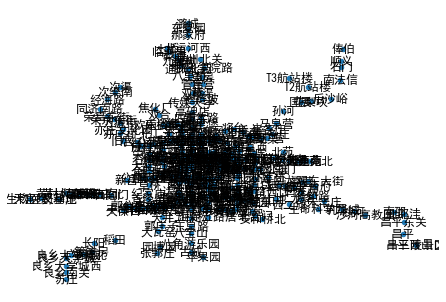

In [63]:
nx.draw(station_graph, sub, with_labels=True, node_size=20)

In [137]:
from collections import defaultdict
threshold = 2

sub_connection = defaultdict(list)
for c1 in sub:
    for c2 in sub:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            sub_connection[c1].append(c2)
            sub_connection[c2].append(c1)

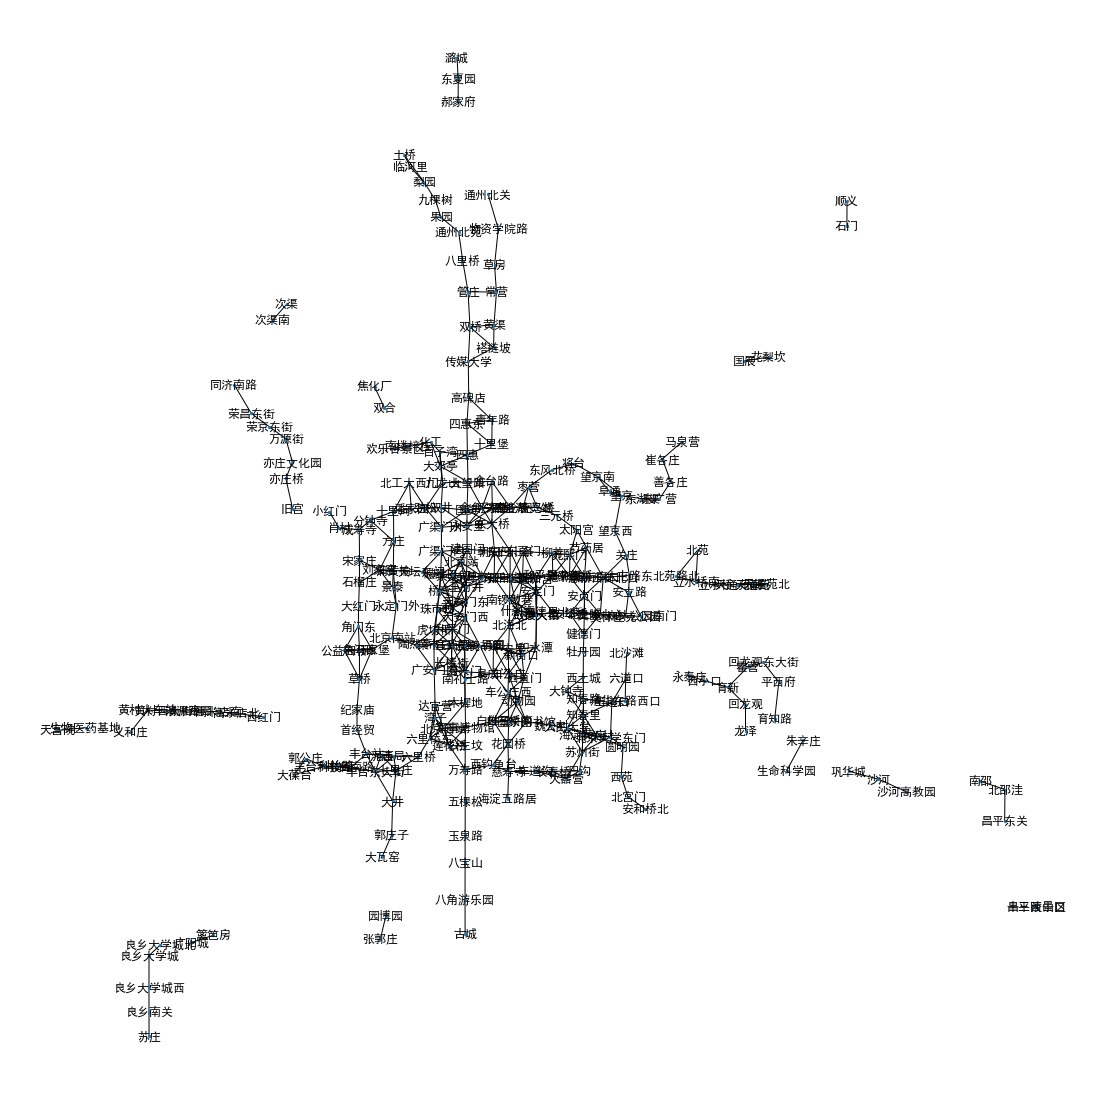

In [138]:
sub_with_road = nx.Graph(sub_connection)
plt.rcParams['figure.figsize'] = (15.0, 15.0)#图片像素 
nx.draw(sub_with_road, sub, with_labels=True, node_size=5)

In [139]:
def search(start, desitination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    while pathes:
        path = pathes.pop(0) #最早的节点  转乘最少
        frontier = path[-1]
        
        if frontier in visitied: continue
        
        successors = connection_graph[frontier]
        
        for s in successors:
            new_path = path + [s]
            
            pathes.append(new_path)
            #print('current pathes:',pathes)
            if s == desitination:
                #print(pathes)
                return new_path
        visitied.add(frontier)
        
        pathes = sort_candidate(pathes) #这里改变排序函数 可以控制搜索策略

In [140]:
def transfer_stations_first(pathes):
    return sorted(pathes, key = len)

In [141]:
def transfer_as_much(pathes):
    return sorted(pathes, key=len, reverse=True)

In [142]:
def shortest_path_fisrt(pathes):
    
    def get_path_distance(path):
        distance = 0
        for i in range(1,len(path)):
            distance += get_geo_distance(path[i-1], path[i])

        return distance
    #print(distance)
    return sorted(pathes, key = get_path_distance)

### 3. Build the search agent

In [143]:
search('知春路','国贸', sub_connection, sort_candidate=transfer_stations_first)

['知春路', '西土城', '牡丹园', '健德门', '安华桥', '安德里北街', '安定门', '北新桥', '东四十条', '东大桥', '国贸']

In [144]:
search('知春路','国贸', sub_connection, sort_candidate= transfer_as_much)

['知春路',
 '海淀黄庄',
 '北京大学东门',
 '圆明园',
 '中关村',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '车公庄',
 '阜成门',
 '复兴门',
 '西单',
 '天安门西',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸']

In [145]:
search('知春路','国贸', sub_connection, sort_candidate= shortest_path_fisrt)

['知春路', '西土城', '牡丹园', '健德门', '安华桥', '安德里北街', '安定门', '北新桥', '东四十条', '东大桥', '国贸']